In [1]:
#!pip install simple_fpa

In [2]:
# %%capture out
# ! cd ..; pip install . --use-feature=in-tree-build

In [3]:
%%capture out
! cd ..; pip install .

In [4]:
print((out.stdout.split('\n')[-2]))

In [5]:
from simple_fpa import Model, load_haile
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Arial"],
    "lines.linewidth": 1,
    "figure.dpi":200
})

In [6]:
data = load_haile()

In [7]:
model = Model(data = data, auctionid_columns = ['auctionid'], bid_column = 'actual_bid')
cont_covs = ['adv_value', 'hhi', 'volume_total_1']
disc_covs = ['year', 'forest']

/Users/pasha/Desktop/Conda/lib/python3.12/site-packages/simple_fpa/model.py:33: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  self.data['_bidders'] = self.data.groupby(by = self.auctionid_columns)['__ones'].transform(sum)


In [8]:
# we can pick a smaller subset of auctions
model.data = model.data[model.data.auctionid.isin(list(set(model.data.auctionid.values))[:1000])].copy()
# we can pick certain numbers of bidders
model.data = model.data[model.data._bidders.isin([3,4,5])].copy()

In [9]:
model.residualize(cont_covs, disc_covs, 'multiplicative')
model.summary()

                            OLS Regression Results                            
Dep. Variable:     np.log(actual_bid)   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     1295.
Date:                Sat, 12 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:27:51   Log-Likelihood:                -700.28
No. Observations:                1811   AIC:                             1455.
Df Residuals:                    1784   BIC:                             1603.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2

In [10]:
# we can simulate artificial data, of course
#model.data._resid = np.sort(np.random.uniform(0,1,size = len(model.data)))

In [11]:
model.trim_residuals(5)
model.fit(smoothing_rate = 0.33, trim_percent = 5, boundary = 'reflect')
model.predict()

In [12]:
model.make_ci_asy(95, hyp = 'twosided')

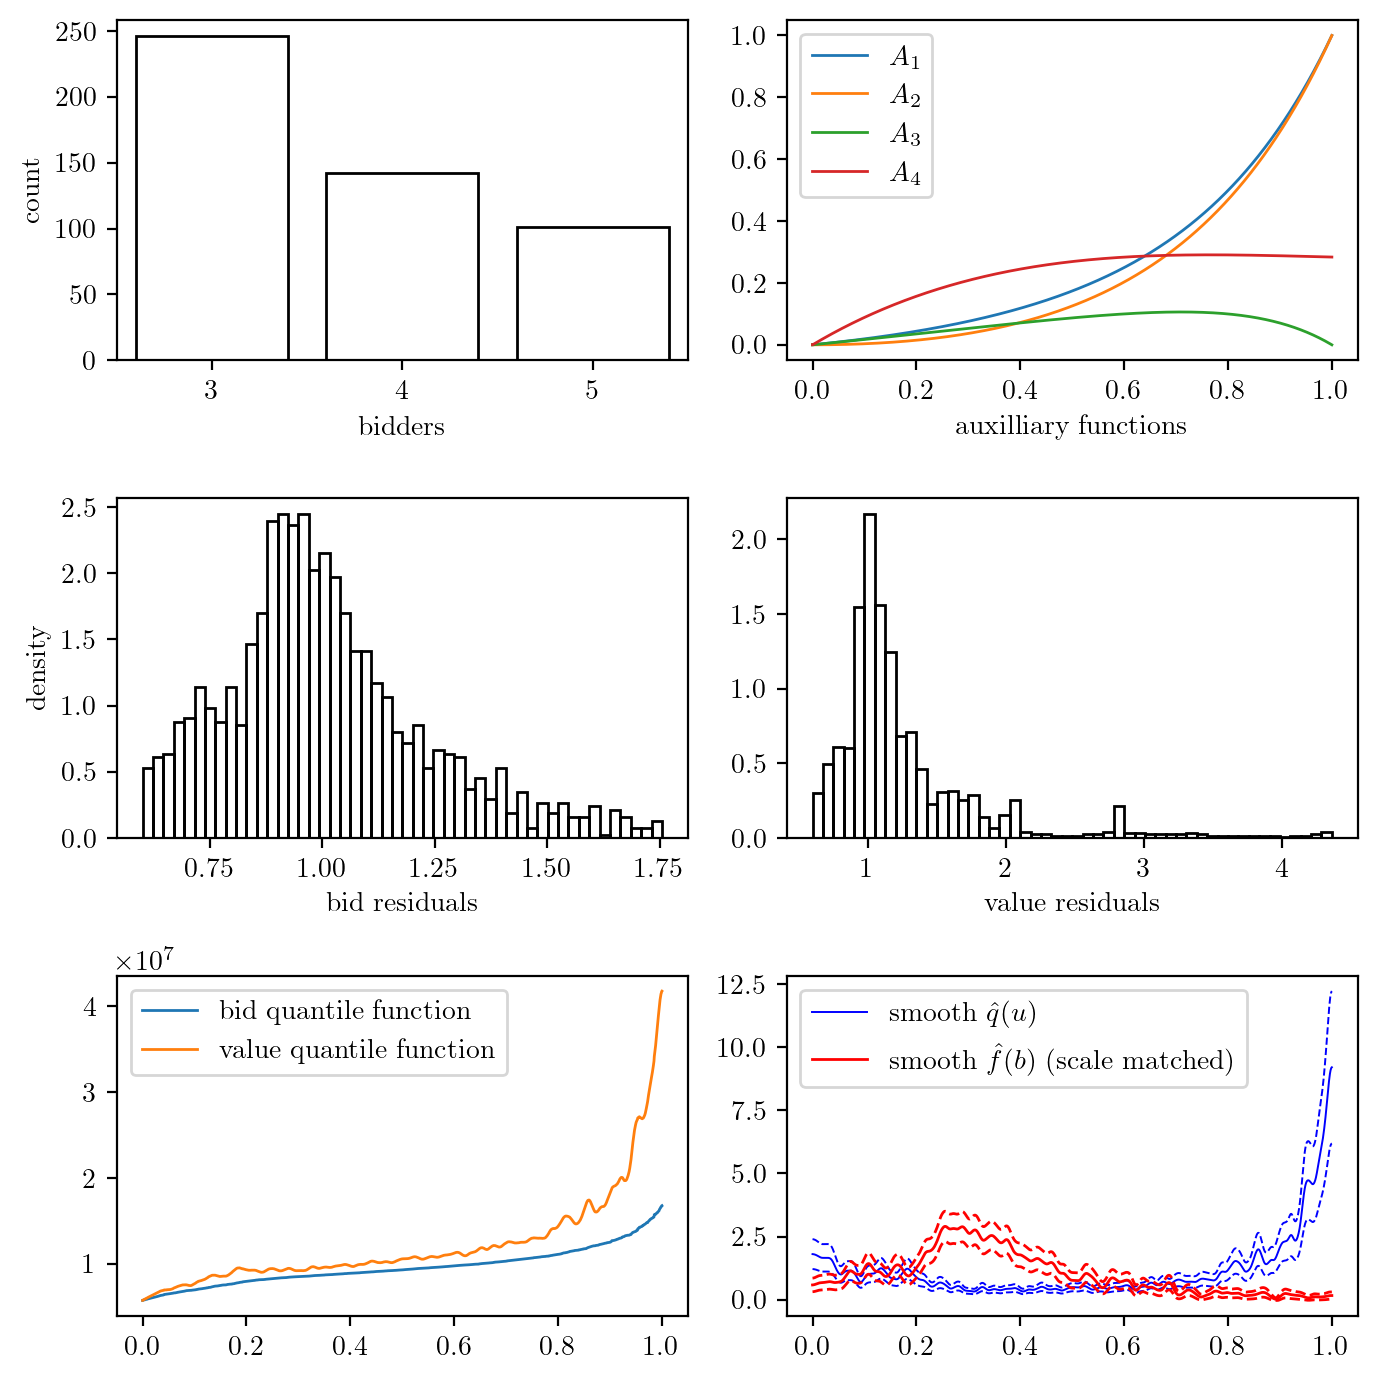

In [13]:
model.plot_stats()

In [14]:
model.make_cicb(95, draws = 1000, hyp = 'twosided')

In [15]:
model.find_optimal_u()

optimal exclusion: 0.18305


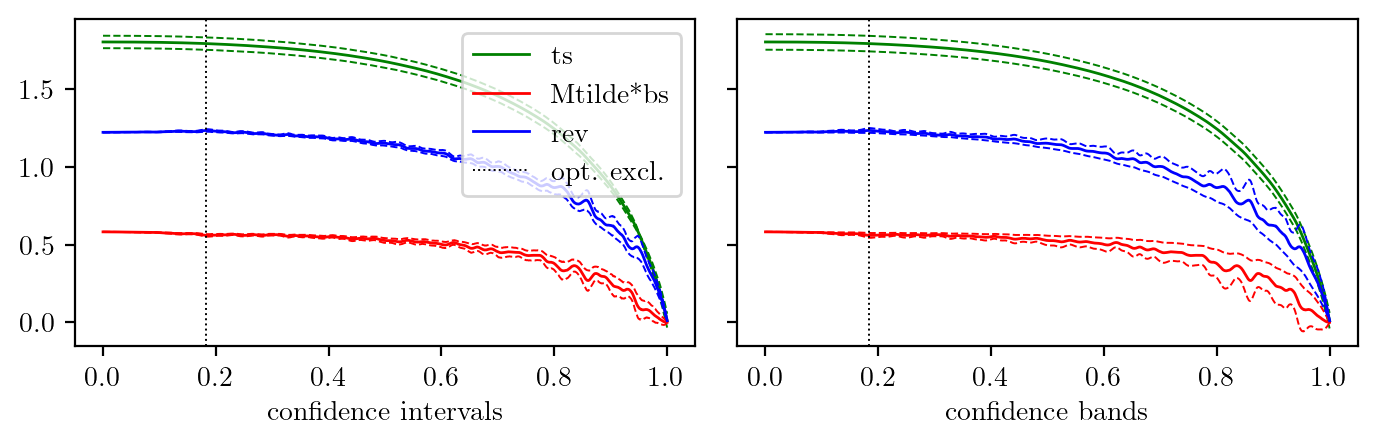

In [16]:
model.plot_counterfactuals()

In [17]:
model.data.sample(5)

auctionid       hhi  forest  adv_value  year  state  volume_total_1  \
193          193  0.504450      16   440780.0    82      6           200.0   
16684        215  0.590234      18  6265730.0    82      6          1310.0   
44513        606  0.630454       9   965818.0    82      5           105.0   
108          108  0.507000      18   200164.0    82     49           955.0   
182          182  0.603182      16  1276020.0    82      6           459.0   

       actual_bid  _bidders    _resid  ...    _ts_ci    _ts_cb     _q_ci  \
193      623405.0         3  0.791400  ...  0.040011  0.049953  0.280780   
16684   8733770.0         5  1.202780  ...  0.034807  0.049953  0.459899   
44513   1393372.0         4  1.184642  ...  0.035336  0.049953  0.564494   
108      202475.0         4  0.467926  ...       NaN       NaN       NaN   
182     3442500.0         4  1.590150  ...  0.034132  0.049953  2.026252   

          _q_cb     _v_ci     _v_cb    _bs_ci    _bs_cb   _rev_ci   _rev_cb  
193    0.579249  0.037308  0.076967  0.001055  0.002175  0.003890  0.008026  
16684  0.907257  0.133429  0.263220  0.012609  0.024875  0.046518  0.091768  
44513  1.093518  0.163904  0.317508  0.015869  0.030740  0.058543  0.113408  
108         NaN       NaN       NaN       NaN       NaN       NaN       NaN  
182    4.177843  0.576849  1.189381  0.011801  0.024332  0.043537  0.089766  

[5 rows x 36 columns]